In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
df = pd.read_csv('covid19_worldData.csv', usecols=['Country_Region', 'Date', 'ConfirmedCases'])
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d")
#leastrecentdate = df["Date"].min()
recentdate = df["Date"].max()

In [3]:
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d").astype(int)
df1 = df.groupby(['Date','Country_Region'])['ConfirmedCases'].sum().reset_index()
df1.head(10)

Date       Country_Region  ConfirmedCases
0  20200122          Afghanistan             0.0
1  20200122              Albania             0.0
2  20200122              Algeria             0.0
3  20200122              Andorra             0.0
4  20200122               Angola             0.0
5  20200122  Antigua and Barbuda             0.0
6  20200122            Argentina             0.0
7  20200122              Armenia             0.0
8  20200122            Australia             0.0
9  20200122              Austria             0.0

In [4]:
Countries = pd.DataFrame(data = df1.Country_Region.unique())

In [5]:
import datetime
current_date = int(recentdate)
dff = (df1[df1['Date'].eq(current_date)].sort_values(by='ConfirmedCases', ascending=False).head(25))
dff

Date  Country_Region  ConfirmedCases
14707  20200410              US        496372.0
14692  20200410           Spain        158273.0
14620  20200410           Italy        147577.0
14597  20200410          France        125931.0
14601  20200410         Germany        122171.0
14572  20200410           China         82941.0
14711  20200410  United Kingdom         74605.0
14616  20200410            Iran         68192.0
14706  20200410          Turkey         47029.0
14552  20200410         Belgium         26667.0
14697  20200410     Switzerland         24551.0
14656  20200410     Netherlands         23249.0
14568  20200410          Canada         22046.0
14559  20200410          Brazil         19638.0
14671  20200410        Portugal         15472.0
14545  20200410         Austria         13555.0
14674  20200410          Russia         11917.0
14626  20200410    Korea, South         10450.0
14619  20200410          Israel         10408.0
14696  20200410          Sweden          9685.0
14618  20200410         Ireland          8089.0
14614  20200410           India          7598.0
14587  20200410         Ecuador          7161.0
14571  20200410           Chile          6501.0
14662  20200410          Norway          6314.0

<BarContainer object of 25 artists>

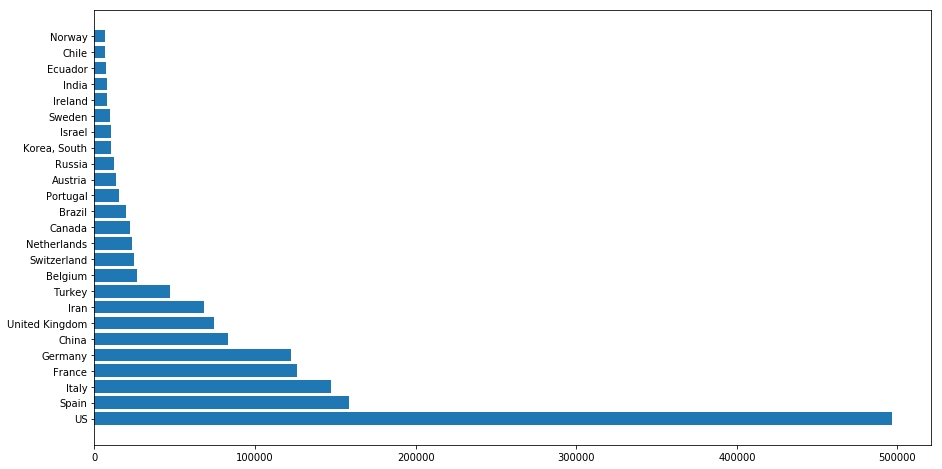

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Country_Region'], dff['ConfirmedCases'])

In [7]:
colors_all = pd.read_csv('ral_standard.csv', usecols=[' HEX']).head(len(Countries.index))
colors_all = colors_all.iloc[::-1]

In [8]:
colors = dict(zip(Countries[0],colors_all[' HEX']))

Text(1, 0.4, '20200410')

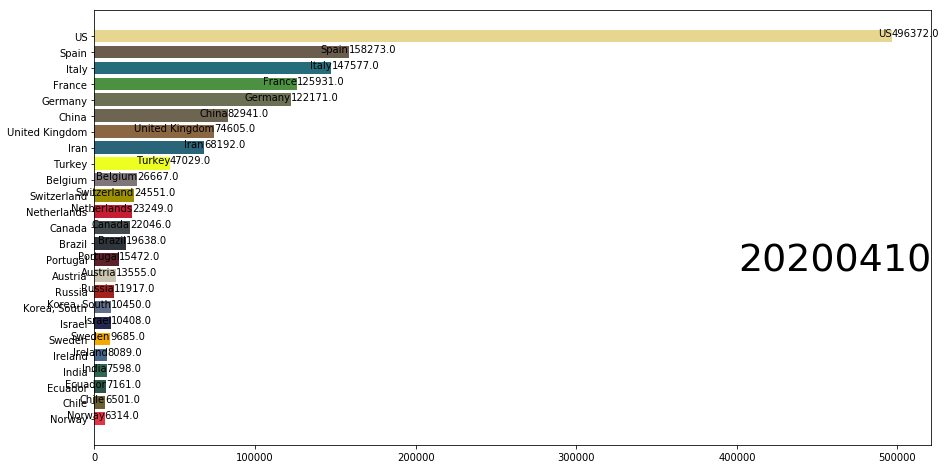

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   

ax.barh(dff['Country_Region'], dff['ConfirmedCases'], color=[colors[x] for x in dff['Country_Region']])
for i, (value, name) in enumerate(zip(dff['ConfirmedCases'], dff['Country_Region'])):
    ax.text(value, i, name, ha='right') 
    ax.text(value, i, value, ha='left')  
ax.text(1, 0.4, current_date, transform=ax.transAxes, size=38, ha='right')

In [10]:
Jan = list(range(20200122,20200132))
Feb = list(range(20200201,20200230))
Mar = list(range(20200301,20200332))
Apr = list(range(20200401,current_date+1))
dateValues = Jan+ Feb + Mar + Apr

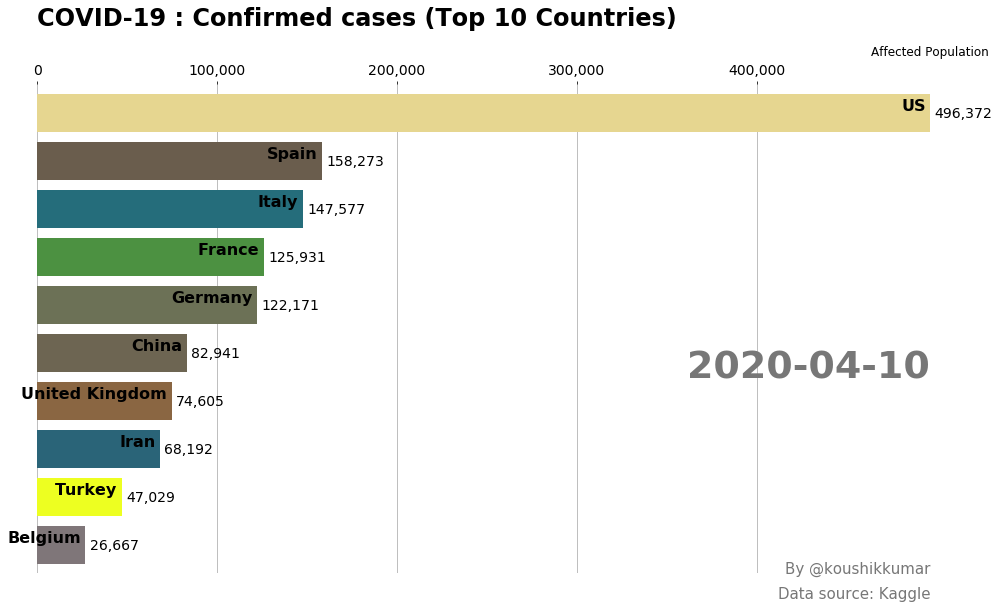

In [11]:
fig, ax = plt.subplots(figsize=(16, 9))
def draw_barchart(currentDate):
    dff = df1[df1['Date'].eq(currentDate)].sort_values(by='ConfirmedCases', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country_Region'], dff['ConfirmedCases'], color=[colors[x] for x in dff['Country_Region']])
    dx = dff['ConfirmedCases'].max() / 200
    for i, (value, name) in enumerate(zip(dff['ConfirmedCases'], dff['Country_Region'])):
        ax.text(value-dx, i, name, size=16, weight=600, ha='right', va='bottom', color="#000000")
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    
    # ... polished styles
    ValidatedDate = datetime.datetime.strptime(str(currentDate), '%Y%m%d')
    ax.text(1, 0.4, ValidatedDate.strftime("%Y-%m-%d"), transform=ax.transAxes, color='#777777', size=38, ha='right', weight=600)
    ax.text(1, 1.06, 'Affected Population', transform=ax.transAxes, size=12, color='#000000', ha='center')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#000000', labelsize=14)
    ax.set_yticks([])
    ax.margins(0, 0.02)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'COVID-19 : Confirmed cases (Top 10 Countries) ', transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'By @koushikkumar', transform=ax.transAxes, size=15, ha='right', color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(1, -0.05, 'Data source: Kaggle', transform=ax.transAxes, size=15, ha='right', color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(current_date)

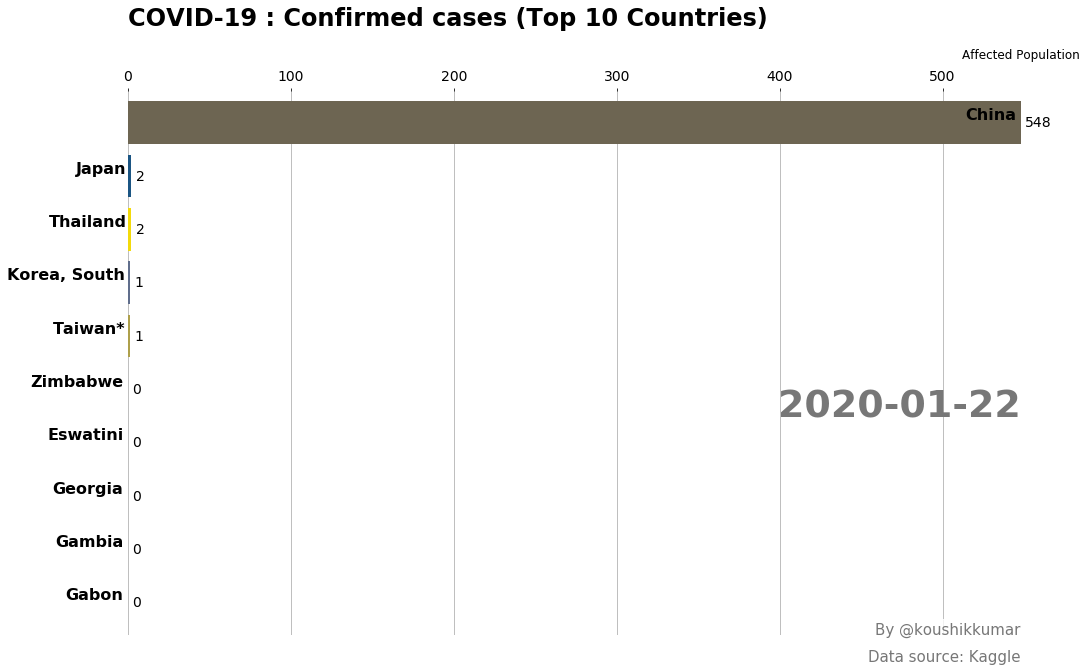

In [12]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(16, 10))
animator = animation.FuncAnimation(fig, draw_barchart,frames=dateValues)
HTML(animator.to_jshtml()) 

In [13]:
#animator.save('CovidData_barChat_Apr10.gif', writer='pillow', fps=2) #Use animator.save to save the files as Gif